In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 
from tensorflow import keras

import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder 

from sklearn import metrics


In [3]:
df = pd.read_csv("the_office_series.csv")
df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [4]:
del df['GuestStars'] # Mainly NaNs
del df['Date']
del df['About']
del df['EpisodeTitle']
del df['Writers']

df.rename(columns = {'Unnamed: 0':'Episode Number'}, inplace = True)

#del df['Unnamed: 0']

df.head()

,Episode Number,Season,Ratings,Votes,Viewership,Duration,Director
0,0,1,7.5,4936,11.2,23,Ken Kwapis
1,1,1,8.3,4801,6.0,23,Ken Kwapis
2,2,1,7.8,4024,5.8,22,Ken Whittingham
3,3,1,8.1,3915,5.4,23,Bryan Gordon
4,4,1,8.4,4294,5.0,23,Greg Daniels


Text(0.5, 1.0, 'IMDb Ratings for The Office episodes')

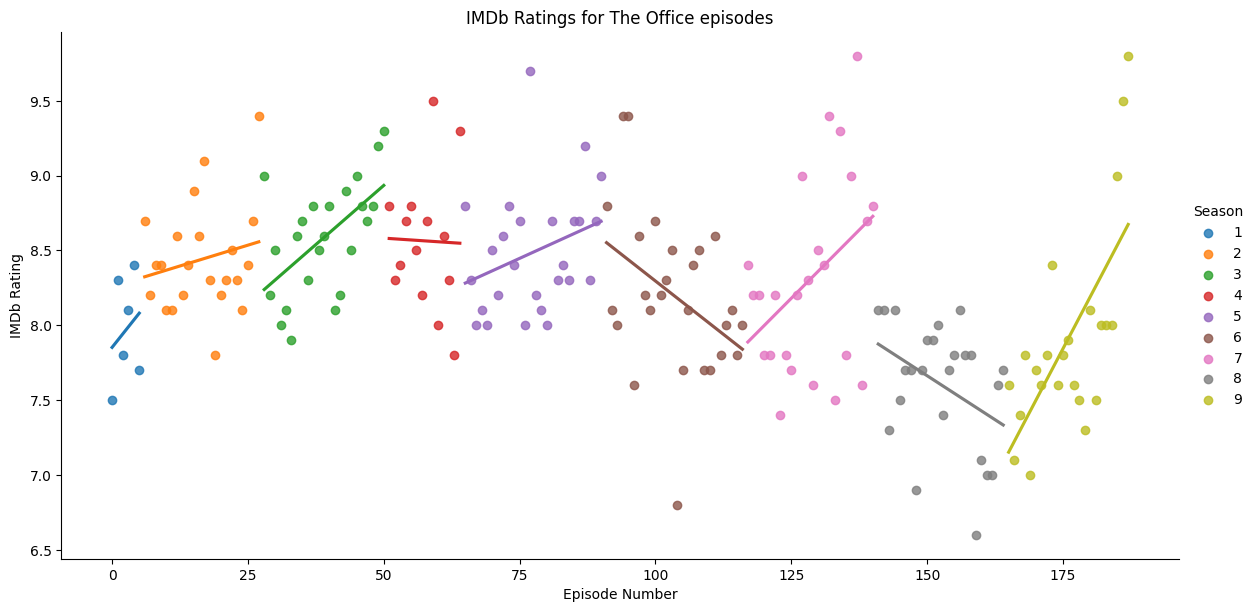

In [4]:
sns.lmplot(x="Episode Number", y="Ratings", hue="Season", data=df, height=6, aspect=2, ci=None)
plt.xlabel("Episode Number")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings for The Office episodes")

# w/o Director

In [5]:
del df['Episode Number']
del df['Director']

In [6]:
Predictors=['Season', 'Votes', 'Viewership', 'Duration'] # EpisodeTitle, Director

X=df[Predictors]
y=df['Ratings']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

lr_pred = model_lr.predict(X_test)

#r_sq = model_lr.score(x, y)


lr_MSE = metrics.mean_squared_error(y_test, lr_pred)
lr_MAE = metrics.mean_absolute_error(y_test, lr_pred)
lr_MAPE = metrics.mean_absolute_percentage_error(y_test, lr_pred)


print('MSE',lr_MSE )

print('MAE', lr_MAE)

print('MAPE', lr_MAPE)


MSE 0.17657084421638433
MAE 0.33227210918252675
MAPE 0.041786781785646425


In [59]:
output_test = ss.inverse_transform(X_test)

outputs = pd.DataFrame(output_test, columns=Predictors)
outputs['Ratings'] = y_test.values
outputs['Linear Regression Ratings'] = lr_pred

outputs.head()

,Season,Votes,Viewership,Duration,Ratings,Linear Regression Ratings
0,9.0,1985.0,3.83,22.0,8.0,7.651026
1,8.0,1902.0,4.17,23.0,7.0,7.706035
2,2.0,3142.0,8.70,22.0,8.3,8.526872
3,2.0,3663.0,9.70,22.0,8.9,8.744156
4,5.0,2621.0,8.07,22.0,8.0,8.189233


<AxesSubplot: xlabel='Linear Regression Ratings', ylabel='Ratings'>

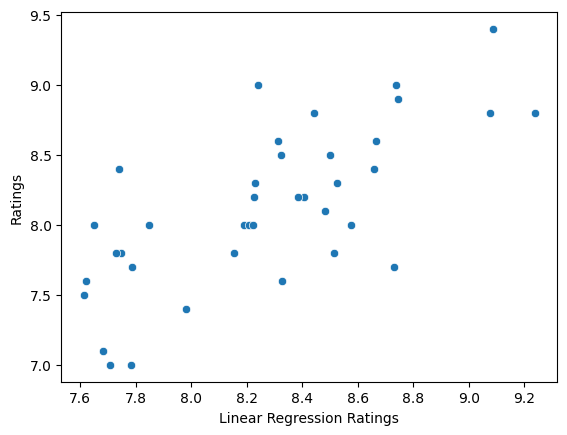

In [49]:
sns.scatterplot(data=outputs, x='Linear Regression Ratings', y='Ratings')

# Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train,y_train)

lasso_pred = lasso_model.predict(X_test)

#r_sq = model_lr.score(x, y)


lasso_MSE = metrics.mean_squared_error(y_test, lasso_pred)
lasso_MAE = metrics.mean_absolute_error(y_test, lasso_pred)
lasso_MAPE = metrics.mean_absolute_percentage_error(y_test, lasso_pred)


print('MSE',lasso_MSE )

print('MAE', lasso_MAE)

print('MAPE', lasso_MAPE)

MSE 0.17518330802382387
MAE 0.3253968903691449
MAPE 0.0413942207162815


In [47]:
scores = [[lr_MSE, lr_MAE, lr_MAPE], [lasso_MSE, lasso_MAE, lasso_MAPE]]
evaluation = pd.DataFrame(scores, columns=['MSE', 'MAE', 'MAPE'], index=['LinearRegression', 'LassoRegression'])

evaluation.head()

,MSE,MAE,MAPE
LinearRegression,0.176571,0.332272,0.041787
LassoRegression,0.175183,0.325397,0.041394


In [60]:
outputs['Lasso Regression Ratings'] = lasso_pred

outputs.head()

,Season,Votes,Viewership,Duration,Ratings,Linear Regression Ratings,Lasso Regression Ratings
0,9.0,1985.0,3.83,22.0,8.0,7.651026,7.884566
1,8.0,1902.0,4.17,23.0,7.0,7.706035,7.878830
2,2.0,3142.0,8.70,22.0,8.3,8.526872,8.431666
3,2.0,3663.0,9.70,22.0,8.9,8.744156,8.635675
4,5.0,2621.0,8.07,22.0,8.0,8.189233,8.229187


# Neural network

In [32]:
model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1) 
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 64.8810 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 53.1035 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 33.2710 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 18.6404 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 15.8313 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 10.4471 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 8.3832 - accuracy: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 6.4643 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 6.0420 - accuracy: 0.0000e+00
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 4.5581 - accu

In [18]:
X_test

array([[ 1.42419186, -1.0649505 , -1.68253966, -0.61478318],
       [ 1.0172799 , -1.18591617, -1.50859062, -0.42329333],
       [-1.42419186,  0.62128185,  0.80902463, -0.61478318],
       [-1.42419186,  1.3805965 ,  1.32063948, -0.61478318],
       [-0.20345598, -0.1380328 ,  0.48670728, -0.61478318],
       [ 0.20345598, -0.50384466,  0.96250909,  0.91713556],
       [-1.0172799 ,  0.95065826, -0.19374046,  0.91713556],
       [-0.20345598, -0.14677731,  0.82948923, -0.61478318],
       [-1.42419186,  1.19550445,  0.80902463, -0.61478318],
       [ 1.0172799 , -1.11887495, -0.49559322, -0.42329333],
       [-0.61036794,  0.06017601,  1.37691711,  0.91713556],
       [ 0.61036794, -0.6962238 ,  0.27182905, -0.42329333],
       [-1.0172799 ,  0.40704144,  0.88065071, -0.80627302],
       [ 1.0172799 , -1.05183374, -1.4011515 , -0.42329333],
       [-0.61036794,  0.59650575,  0.95227679, -0.61478318],
       [-0.20345598, -0.08993802,  0.95739294, -0.61478318],
       [ 0.20345598, -0.

In [31]:
testnp = np.array([[7, 5000, 2.0, 23]])
testnp = ss.fit_transform(testnp)
lr_test = model_lr.predict(testnp)
print(lr_test)

[8.26533333]


In [35]:
testnp = np.array([[2, 3000, 2.0, 23]])
testnp = ss.fit_transform(testnp)
test_pred = model.predict(testnp)
print(test_pred)

1/1 [==============================] - 0s 27ms/step
[[8.766369]]


In [16]:
nn_pred = model.predict(X_test)


nn_MSE = metrics.mean_squared_error(y_test, nn_pred)
nn_MAE = metrics.mean_absolute_error(y_test, nn_pred)
nn_MAPE = metrics.mean_absolute_percentage_error(y_test, nn_pred)


print('MSE', nn_MSE )
print('MAE', nn_MAE)
print('MAPE', nn_MAPE)

2/2 [==============================] - 0s 3ms/step
MSE 0.23725173580700726
MAE 0.3676405078486394
MAPE 0.045642731264973584


In [57]:
evaluation.loc["NeuralNetwork"] = [nn_MSE, nn_MAE, nn_MAPE]
evaluation.head()

,MSE,MAE,MAPE
LinearRegression,0.176571,0.332272,0.041787
LassoRegression,0.175183,0.325397,0.041394
NeuralNetwork,0.291796,0.462732,0.057425


In [61]:
outputs['Neural Network Ratings'] = nn_pred

outputs.head()

,Season,Votes,Viewership,Duration,Ratings,Linear Regression Ratings,Lasso Regression Ratings,Neural Network Ratings
0,9.0,1985.0,3.83,22.0,8.0,7.651026,7.884566,7.641966
1,8.0,1902.0,4.17,23.0,7.0,7.706035,7.878830,7.641966
2,2.0,3142.0,8.70,22.0,8.3,8.526872,8.431666,8.428260
3,2.0,3663.0,9.70,22.0,8.9,8.744156,8.635675,8.799399
4,5.0,2621.0,8.07,22.0,8.0,8.189233,8.229187,8.741689


In [62]:
model.save('nn1.h5')

# w Director

In [30]:
del df['Episode Number']

from sklearn.preprocessing import LabelEncoder 

director_encoder = LabelEncoder()
df.iloc[:, 5] = director_encoder.fit_transform(df.iloc[:, 5])

df.head()

C:\Users\tothb\AppData\Local\Temp\ipykernel_12428\193382990.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 5] = director_encoder.fit_transform(df.iloc[:, 5])


,Season,Ratings,Votes,Viewership,Duration,Director
0,1,7.5,4936,11.2,23,32
1,1,8.3,4801,6.0,23,32
2,1,7.8,4024,5.8,22,33
3,1,8.1,3915,5.4,23,7
4,1,8.4,4294,5.0,23,19


In [31]:
Predictors=['Season', 'Votes', 'Viewership', 'Duration', 'Director']

X=df[Predictors]
y=df['Ratings']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

lr_pred_d = model_lr.predict(X_test)

lr_MSE_d = metrics.mean_squared_error(y_test, lr_pred_d)
lr_MAE_d = metrics.mean_absolute_error(y_test, lr_pred_d)
lr_MAPE_d = metrics.mean_absolute_percentage_error(y_test, lr_pred_d)


print('MSE',lr_MSE )

print('MAE', lr_MAE)

print('MAPE', lr_MAPE)

MSE 0.17639134683929805
MAE 0.33218732137076956
MAPE 0.04177664277017578


In [34]:
lr_output_d = pd.DataFrame(X_test, columns=Predictors)
lr_output_d['Ratings'] = y_test.values
lr_output_d['Predicted Ratings'] = lr_pred_d

lr_output_d.head()

,Season,Votes,Viewership,Duration,Director,Ratings,Predicted Ratings
0,1.424192,-1.064950,-1.682540,-0.614783,0.750164,8.0,7.651879
1,1.017280,-1.185916,-1.508591,-0.423293,-0.906373,7.0,7.705535
2,-1.424192,0.621282,0.809025,-0.614783,-0.768328,8.3,8.526184
3,-1.424192,1.380597,1.320639,-0.614783,-1.251485,8.9,8.743160
4,-0.203456,-0.138033,0.486707,-0.614783,-0.492239,8.0,8.188914
